# Serie 12

## Aufgabe 12.1
Das Bundesamt für Statistik stellt eine sehr grosse Anzahl von Datensätzen auf ihrer Webseite zur Verfügung. Mit Hilfe des Tools `STAT-TAB` ist es relativ einfach, nach bestimmten Datensätze Ausschau zu halten and spezifische Tabellen herunterzuladen und individuell zusammenzustellen.

### a)
Besuchen Sie die Webseite
[STAT TAB](https://www.bfs.admin.ch/bfs/en/home/services/recherche/stat-tab-online-data-search.html)
und versuchen Sie, mit dem Datenbrowser zurechtzukommen.

Hinweis: Konsultieren Sie folgendes Hilfsmenu: _Guideline for online data search_, welches Sie am Ende der Seite herunterladen können.

### b)
Die Mehrzahl der Datensätze auf dieser Webseite beinhalten tatsächlich Zeitreihen. Versuchen Sie die Zeitreihe zu finden, welche die Anzahl Elektro-Personenwagen(PW) von 1990-2017 enthält (separat für jeden Kanton). Laden Sie die entsprechende Tabelle als `.csv` Datei herunter.

### c) Lesen Sie die Datei in Python ein, und definieren Sie eine Zeitreihe für die
Anzahl Elektro-Autos in Luzern. Erstellen Sie eine Graphik der Zeitreihe.

__Hinweis__: Die Dateien, welche mit Hilfe von `STAT-TAB` generiert werden, enthalten manchmal zusätzliche Informationen neben den regulären Headern mit den Variablennamen. Schauen Sie sich die `.csv` Datei in einem Texteditoran. Finden Sie heraus, wieviele Zeilen dem tatsächlichen Datensatz vorangehen (ausgenommen vom Header). Dann können Sie mit der Python-Funktion `pd.read_csv()` die Daten einlesen, wobei Sie mit Hilfe des Parameters `skiprows=k` die ersten `k` Zeilen überspringen können:

```python
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

pw_electric = pd.read_csv('.../PW_electric.csv', sep=',',
    skiprows=2, header=0,
    encoding = "utf-8",
    index_col=0)

pw_electric.head()
pw_electric_luzern = DataFrame(pw_electric.ix["Luzern",1:])
pw_electric_luzern
pw_electric_luzern["Year"] = pd.DatetimeIndex(pw_electric_luzern.index)
pw_electric_luzern.set_index("Year", inplace=True)
pw_electric_luzern.plot()
plt.xlabel("Jahr")
plt.ylabel("Anzahl Elektro-Autos Luzern")
plt.show()
```

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [15]:
pw_electric = pd.read_csv(r'./PW_electric.csv', sep=',',
    skiprows=2, header=0,
    encoding = "utf-8",
    index_col=0)

In [16]:
pw_electric.head()

,Treibstoff,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Kanton,,,,,,,,,,,,,,,,,,,,,
Zürich,Electricity,64,120,161,153,153,150,139,131,121,...,32,42,150,211,428,737,1201,2201,2855,3743
Bern / Berne,Electricity,75,130,132,134,113,113,108,101,99,...,42,42,46,108,177,269,428,682,971,1343
Luzern,Electricity,12,21,25,24,23,20,21,18,14,...,5,3,10,38,79,118,196,350,530,719
Uri,Electricity,0,0,0,0,0,0,0,0,0,...,1,1,1,2,4,5,10,12,22,29
Schwyz,Electricity,1,5,7,8,9,10,11,11,12,...,0,2,7,15,37,54,112,195,292,387


In [18]:
pw_electric.loc["Luzern","1990":"2017"]

1990     12
1991     21
1992     25
1993     24
1994     23
1995     20
1996     21
1997     18
1998     14
1999     12
2000     12
2001     13
2002      9
2003      8
2004      5
2005      3
2006      2
2007      3
2008      5
2009      3
2010     10
2011     38
2012     79
2013    118
2014    196
2015    350
2016    530
2017    719
Name: Luzern, dtype: object

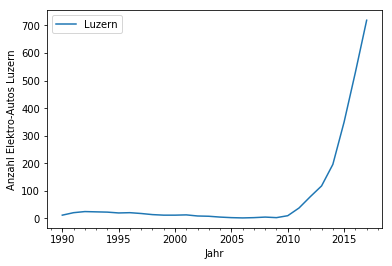

In [68]:
pw_electric_luzern = DataFrame(pw_electric.loc["Luzern","1990":"2017"])
pw_electric_luzern
pw_electric_luzern["Year"] = pd.DatetimeIndex(pw_electric_luzern.index)
pw_electric_luzern.set_index("Year", inplace=True)
pw_electric_luzern.plot()
plt.xlabel("Jahr")
plt.ylabel("Anzahl Elektro-Autos Luzern")
plt.show()

 ### d)
 Wiederholen Sie die Vorgehensweise aus Teilaufgabe (c) für den Kanton Zürich.

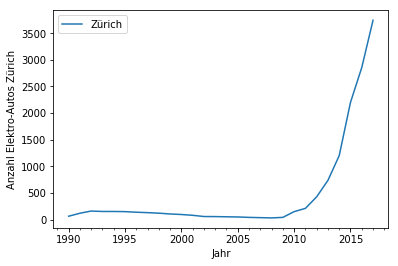

In [69]:
pw_electric_zurich = DataFrame(pw_electric.loc["Zürich","1990":"2017"])
pw_electric_zurich
pw_electric_zurich["Year"] = pd.DatetimeIndex(pw_electric_zurich.index)
pw_electric_zurich.set_index("Year", inplace=True)
pw_electric_zurich.plot()
plt.xlabel("Jahr")
plt.ylabel("Anzahl Elektro-Autos Zürich")
plt.show()

In [76]:

pw_electric_zurich.index

DatetimeIndex(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

### e) 
Wie können Sie die Daten zwischen den Kantonen Luzern und Zürich korrekt miteinander vergleichen?

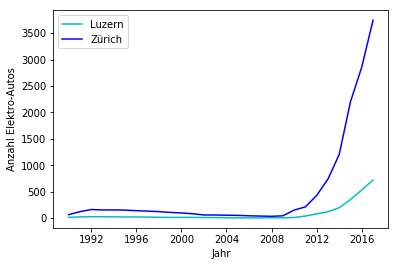

In [85]:
plt.plot(pw_electric_zurich.index,pw_electric_luzern["Luzern"], 'c-', label="Luzern")
plt.plot(pw_electric_zurich.index,pw_electric_zurich["Zürich"], 'b-', label="Zürich")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Elektro-Autos")
plt.legend(loc='best')
plt.show()

## Aufgabe 12.2

In dieser Aufgabe behandeln wir die vierteljährliche Bierproduktion in Australien.

### a)
Lesen Sie die Datei AustralianBeer.csv in Python ein, und konvertieren Sie die Daten in das Zeitreihenformat. Zeichnen Sie die Daten auf.

__Hinweis__: Um die Daten in Python in eine Zeitreihe zu konvertieren, benützen Sie
```python
AusBeer = pd.read_csv(".../AustralianBeer.csv",sep=";",header=0)
AusBeer.head()
AusBeer["Quarter"] = pd.DatetimeIndex(AusBeer["Quarter"])
AusBeer.set_index("Quarter", inplace=True)
AusBeer.columns=["Megalitres"]
AusBeer.head()
AusBeer.describe()
AusBeer.plot()
plt.ylabel("Megalitres Beer")
```

### b)

Zeichnen Sie die aggregierten jährlichen Reihen auf und die Boxplots, welche die beobachteten Daten im Vierteljahr-Zyklus zusammenfassen. Kommentieren Sie Ihre Beobachtungen der Graphiken.
__Hinweis__:
```python
AusBeer.resample("A").mean().plot()
AusBeer['quarter'] = AusBeer.index.quarter
AusBeer.boxplot(by="quarter")
```

### c)

Zerlegen Sie die Zeitreihe in die Komponenten _trend, saisonalen Effekt_ und _Residuen_
mit Hilfe der Funktion `seasonal_decompose()`. Kommentieren Sie die Resultate. Denken Sie, eine Datentransformation vor der Zerlegung wäre angebracht?

__Hinweis__:
```python
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(AusBeer1, model="additive", freq=4).plot()
```

## Aufgabe 12.3

In dieser Aufgabe behandeln wir die vierteljährliche Produktion von Elektrizität.

### a)
Lesen Sie die Datei `AustralianElectricity.csv` in __Python__ ein, und konvertieren Sie die Daten in das Zeitreihenformat. Zeichnen Sie die Daten auf.

__Hinweis__: Um die Daten in Python in eine Zeitreihe zu konvertieren, benützen Sie

```python
Electricity = pd.read_csv(".../AustralianElectricity.csv", sep=";", header=0)
Electricity.head()
Electricity["Quarter"] = pd.DatetimeIndex(Electricity["Quarter"])
Electricity.set_index("Quarter", inplace=True)
Electricity.columns=["Electricity production Australia"]
Electricity.head()
Electricity.plot()
plt.ylabel("Million Kilowatthours")
```

### b)
Wenden Sie eine passende Daten-Transformation an, so dass sich die Varianz der Zeitreihe stabilisiert wird.

__Hinweis__: Wenden Sie die Funktion `box.cox` an, und bestimmen Sie einen optimalen Wert für `lambda`, indem Sie die Graphik der transformierten Zeitreihe betrachten. Hier ist der Code mit `lambda = 1.3`:

```python
def boxcox(x,lambd):
    return np.log(x) if (lambd==0) else (x ** lambd-1)/lambd

# replace "yourSeries" by the name of your series
yourSeries_tr = boxcox(yourSeries, 1.3)
yourSeries_tr.plot()
plt.show()
```

### c)

Zerlegen Sie die Zeitreihe in die Komponenten _trend, saisonale Effekte_ und _Residuen_ mit Hilfe der Funktion `seasonal_decompose()`. Kommentieren Sie die Resultate. Denken Sie, eine Datentransformation vor der Zerlegung wäre angebracht?

__Hinweis__:
```python
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(Electricity_tr, model="additive", freq=4).plot()
plt.show()
```

### d)
Zerlegen Sie die Zeitreihe erneut, indem Sie die Funktion `decompose()` aus dem Paket `stldecompose` benützen. Wählen Sie einen geeigneten Wert für den Parameter `period`. Vergleichen Sie die Resultate mit denjenigen der Teilaufgabe c).